# Random Decision Forests
## MNIST Dataset

Import packages

In [1]:
import matplotlib.pyplot as plt  #Graphics
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from subprocess import call
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline

Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape matrices to 784-length vectors for training
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


Plot elements of training dataset

In [3]:
def print_image(df):
    temp = df.reshape(28,28).astype('uint8')
    plt.imshow(temp)

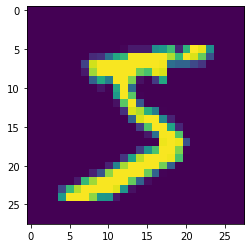

In [4]:
print_image(x_train[0])


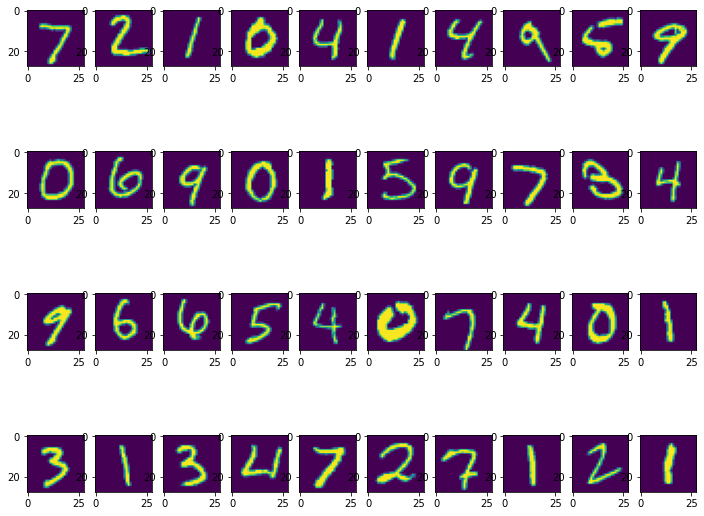

In [5]:
plt.figure(figsize=(12,10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(x_test[i])

Create and train model

In [6]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

Show classification report and confusion matrix

In [7]:
pred=rf.predict(x_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Report
[[ 972    0    1    0    0    2    1    1    3    0]
 [   0 1123    2    3    1    2    2    1    1    0]
 [   6    0 1001    4    3    0    3   10    5    0]
 [   1    0    8  975    0    7    0    9  

Plot single tree

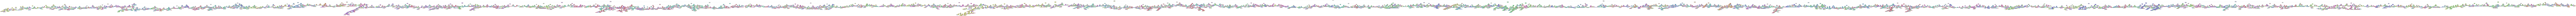

In [8]:
# Export as dot file
export_graphviz(rf.estimators_[0], out_file='tree.dot', rounded=True, proportion=False,
                precision=2, filled=True)

# Convert to png and display
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename='tree.png')